# EDA on Zomato Data set & Predict the Zomato Restaurant Prices using Machine Learning

<img src="https://149695847.v2.pressablecdn.com/wp-content/uploads/2023/09/zomato-1200x600-1.jpg">

# Main Objective:

- The main agenda of this project is:

- Perform extensive Exploratory Data Analysis(EDA) on the Zomato Dataset.

- Build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Prices based on certain features

# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# reading the csv file

In [2]:
zmt = pd.read_csv('C:/Users/Pradeep/Desktop/zomato_dataset.csv')

# printing top 5 columns

In [3]:
zmt.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


# checking is there any null values

In [4]:
zmt.isnull().sum()

Restaurant Name        0
Dining Rating      32236
Delivery Rating     1280
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64

# how many columns and rows in data set

In [5]:
zmt.shape

(123657, 12)

# information about the data

In [6]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


# dropping duplicates

In [7]:
zmt=zmt.drop_duplicates()
zmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101530 entries, 0 to 123635
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  101530 non-null  object 
 1   Dining Rating    74572 non-null   float64
 2   Delivery Rating  100286 non-null  float64
 3   Dining Votes     101530 non-null  int64  
 4   Delivery Votes   101530 non-null  int64  
 5   Cuisine          101530 non-null  object 
 6   Place Name       101530 non-null  object 
 7   City             101530 non-null  object 
 8   Item Name        101530 non-null  object 
 9   Best Seller      19143 non-null   object 
 10  Votes            101530 non-null  int64  
 11  Prices           101530 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 10.1+ MB


In [8]:
zmt.isnull().sum()

Restaurant Name        0
Dining Rating      26958
Delivery Rating     1244
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        82387
Votes                  0
Prices                 0
dtype: int64

# dropping the column which has more null values

In [9]:
zmt=zmt.drop(columns=['Best Seller'])
zmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101530 entries, 0 to 123635
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  101530 non-null  object 
 1   Dining Rating    74572 non-null   float64
 2   Delivery Rating  100286 non-null  float64
 3   Dining Votes     101530 non-null  int64  
 4   Delivery Votes   101530 non-null  int64  
 5   Cuisine          101530 non-null  object 
 6   Place Name       101530 non-null  object 
 7   City             101530 non-null  object 
 8   Item Name        101530 non-null  object 
 9   Votes            101530 non-null  int64  
 10  Prices           101530 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 9.3+ MB


# describe the data

In [10]:
zmt.describe()

,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Votes,Prices
count,74572.000000,100286.000000,101530.000000,101530.000000,101530.000000,101530.000000
mean,3.821067,3.959520,151.559726,116.704009,19.110371,243.690758
std,0.408460,0.246504,230.662157,243.856446,108.264166,197.534461
min,2.500000,2.500000,0.000000,0.000000,0.000000,0.950000
25%,3.600000,3.800000,0.000000,0.000000,0.000000,130.000000
50%,3.900000,4.000000,30.000000,0.000000,0.000000,209.000000
75%,4.100000,4.100000,221.000000,37.000000,10.000000,299.000000
max,4.800000,4.600000,997.000000,983.000000,9750.000000,12024.000000


# grouping the rows in the DataFrame based on the unique values in the 'City' column.

In [11]:
city_prices = zmt.groupby('City')['Prices'].agg(['min', 'max']).reset_index()
city_prices


,City,min,max
0,Ahmedabad,2.00,2599.00
1,Banaswadi,47.65,1250.00
2,Bangalore,0.95,3999.00
3,Chennai,0.95,6500.00
4,Goa,8.00,2300.00
5,Hyderabad,0.95,3250.00
6,Jaipur,0.95,3000.00
7,Kochi,0.95,2749.00
8,Kolkata,0.95,12024.00
9,Lucknow,1.00,5593.22


# calculates the mean (average) of the 'Prices' column for each restaurant

In [12]:
average_prices = zmt.groupby('Restaurant Name')['Prices'].mean().reset_index()
average_prices

,Restaurant Name,Prices
0,12 To 12 BBQ,276.897810
1,1441 Pizzeria,346.029333
2,1944 -The HOCCO Kitchen,345.020833
3,4M Biryani House,203.765306
4,7 Plates,241.960000
...,...,...
821,Zaffran Mataam Alarabi,886.111111
822,Zam Zam Briyani,241.446809
823,Zam Zam Restaurant,178.134146
824,Zeeshan Biryani Corner,167.794118


# data visualization

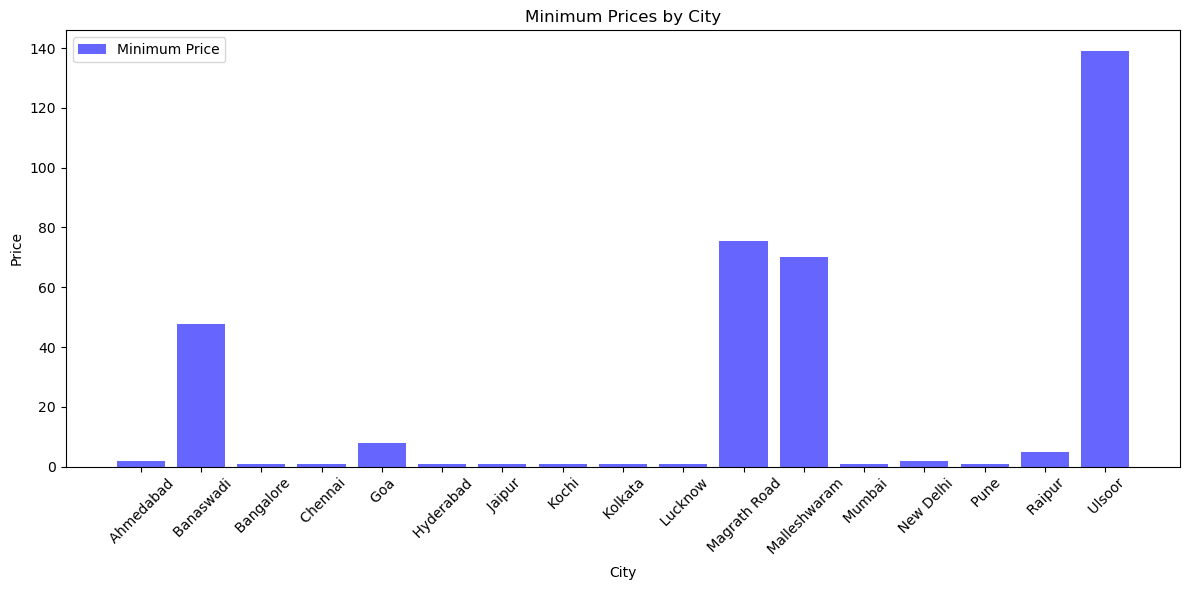

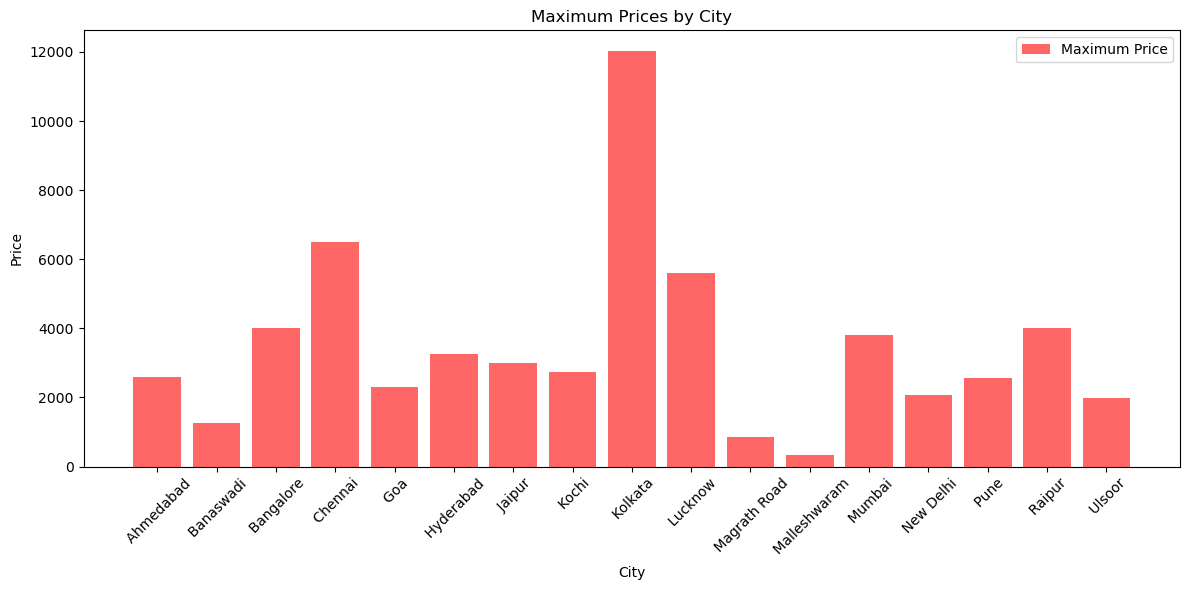

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(city_prices['City'], city_prices['min'], label='Minimum Price', color='blue', alpha=0.6)
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Minimum Prices by City')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(city_prices['City'], city_prices['max'], label='Maximum Price', color='red', alpha=0.6)
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Maximum Prices by City')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


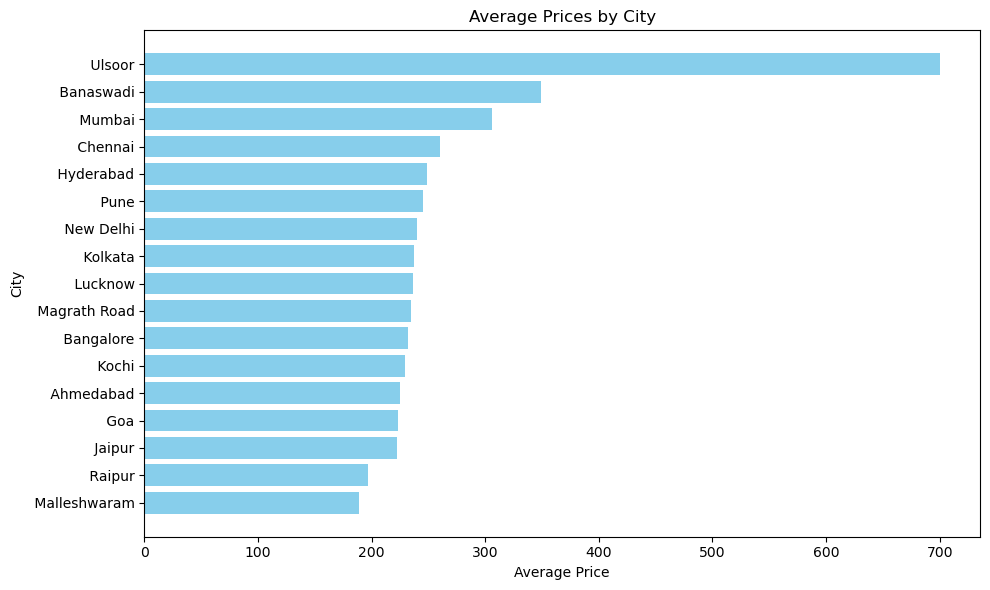

In [14]:
# Load your dataset into a pandas DataFrame
data = zmt.copy()

# Group the data by city and calculate the average price in each city
city_avg_price = data.groupby('City')['Prices'].mean().reset_index()

# Sort the data by average price in descending order
city_avg_price = city_avg_price.sort_values(by='Prices', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(city_avg_price['City'], city_avg_price['Prices'], color='skyblue')
plt.xlabel('Average Price')
plt.ylabel('City')
plt.title('Average Prices by City')
plt.gca().invert_yaxis()  # Invert the y-axis to display the city with the highest average price at the top
plt.tight_layout()
plt.show()

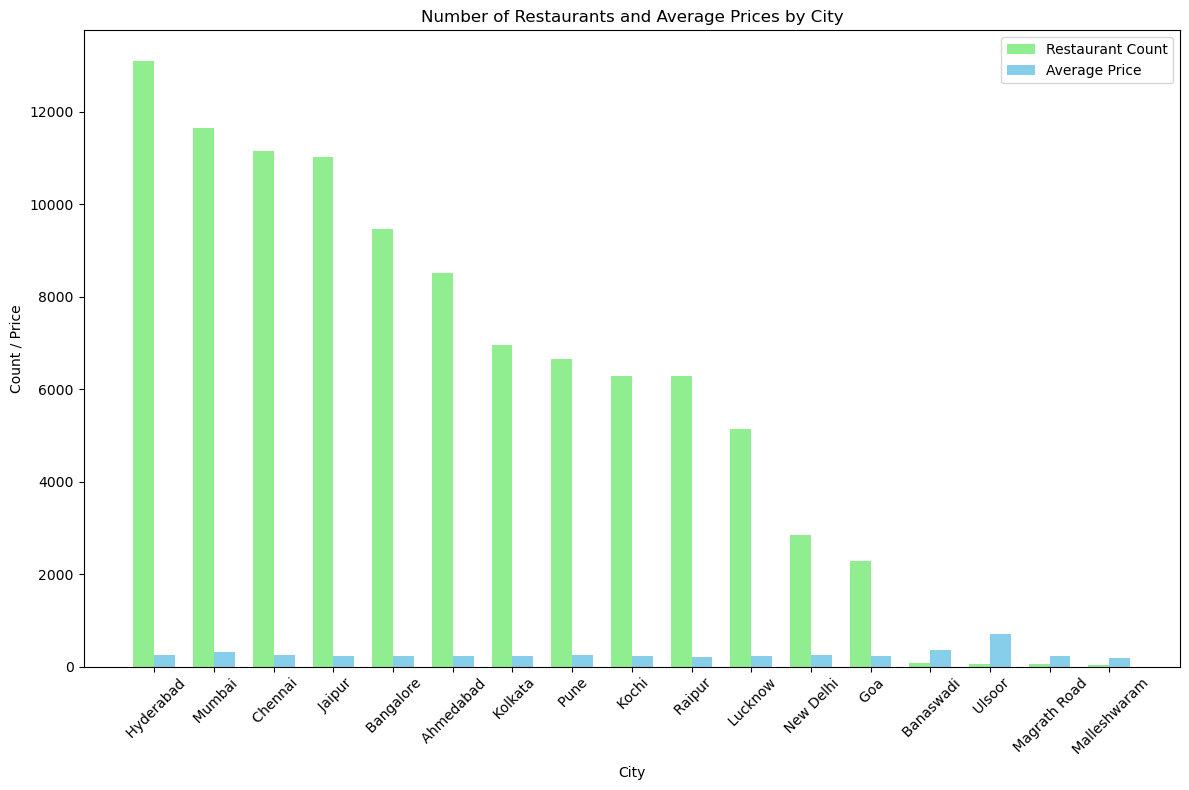

In [15]:
# Load your dataset into a pandas DataFrame
data = zmt.copy()

# Group the data by city and calculate the count of restaurants and average price in each city
city_stats = data.groupby('City').agg({'Restaurant Name': 'count', 'Prices': 'mean'}).reset_index()
city_stats.columns = ['City', 'Restaurant Count', 'Average Price']

# Sort the data by restaurant count in descending order
city_stats = city_stats.sort_values(by='Restaurant Count', ascending=False)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(city_stats))

# Bars for restaurant count
plt.bar(index, city_stats['Restaurant Count'], bar_width, label='Restaurant Count', color='lightgreen')

# Bars for average price
plt.bar(index + bar_width, city_stats['Average Price'], bar_width, label='Average Price', color='skyblue')

plt.xlabel('City')
plt.ylabel('Count / Price')
plt.title('Number of Restaurants and Average Prices by City')
plt.xticks(index + bar_width / 2, city_stats['City'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



# merging the 'zmt' DataFrame with the 'average_prices' DataFrame on the 'Restaurant Name' 

In [16]:
zmt = pd.merge(zmt, average_prices, on='Restaurant Name', how='left')
zmt

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Votes,Prices_x,Prices_y
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,84,249.0,165.114286
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,45,129.0,165.114286
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,39,189.0,165.114286
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,43,189.0,165.114286
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,31,205.0,165.114286
...,...,...,...,...,...,...,...,...,...,...,...,...
101525,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Fruit Raita,0,125.0,353.155738
101526,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Boondi Raita,0,125.0,353.155738
101527,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Mint Raita,0,125.0,353.155738
101528,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Mint Chutney,0,50.0,353.155738


# information of data

In [17]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101530 entries, 0 to 101529
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  101530 non-null  object 
 1   Dining Rating    74572 non-null   float64
 2   Delivery Rating  100286 non-null  float64
 3   Dining Votes     101530 non-null  int64  
 4   Delivery Votes   101530 non-null  int64  
 5   Cuisine          101530 non-null  object 
 6   Place Name       101530 non-null  object 
 7   City             101530 non-null  object 
 8   Item Name        101530 non-null  object 
 9   Votes            101530 non-null  int64  
 10  Prices_x         101530 non-null  float64
 11  Prices_y         101530 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 10.1+ MB


# renaming the columns

In [18]:
zmt = zmt.rename(columns={'Prices_x': 'Original Price','Prices_y':'Average Price'})
zmt

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Votes,Original Price,Average Price
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,84,249.0,165.114286
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,45,129.0,165.114286
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,39,189.0,165.114286
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,43,189.0,165.114286
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,31,205.0,165.114286
...,...,...,...,...,...,...,...,...,...,...,...,...
101525,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Fruit Raita,0,125.0,353.155738
101526,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Boondi Raita,0,125.0,353.155738
101527,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Mint Raita,0,125.0,353.155738
101528,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Mint Chutney,0,50.0,353.155738


#  The mean value of the 'Dining Rating' column  and assigns it to the variable 'h'.

In [19]:
h=zmt['Dining Rating'].mean()

# Fills the missing values in the 'Dining Rating' with the value 'h' 

In [20]:
zmt['Dining Rating'].fillna(h,inplace=True)

#  The mean value of the 'Delivery Rating' column  and assigns it to the variable 'g'.

In [21]:
g=zmt['Delivery Rating'].mean()

# Fills the missing values in the 'Delivery Rating' with the value 'g' 

In [22]:
zmt['Delivery Rating'].fillna(g,inplace=True)

# information of the data

In [23]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101530 entries, 0 to 101529
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  101530 non-null  object 
 1   Dining Rating    101530 non-null  float64
 2   Delivery Rating  101530 non-null  float64
 3   Dining Votes     101530 non-null  int64  
 4   Delivery Votes   101530 non-null  int64  
 5   Cuisine          101530 non-null  object 
 6   Place Name       101530 non-null  object 
 7   City             101530 non-null  object 
 8   Item Name        101530 non-null  object 
 9   Votes            101530 non-null  int64  
 10  Original Price   101530 non-null  float64
 11  Average Price    101530 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 10.1+ MB


# printing top five lines

In [24]:
zmt.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Votes,Original Price,Average Price
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,84,249.0,165.114286
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,45,129.0,165.114286
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,39,189.0,165.114286
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,43,189.0,165.114286
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,31,205.0,165.114286


# machine learning

# copying the data

In [25]:
zmt1 = zmt.copy()
zmt1

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Votes,Original Price,Average Price
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,84,249.0,165.114286
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,45,129.0,165.114286
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,39,189.0,165.114286
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,43,189.0,165.114286
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,31,205.0,165.114286
...,...,...,...,...,...,...,...,...,...,...,...,...
101525,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Fruit Raita,0,125.0,353.155738
101526,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Boondi Raita,0,125.0,353.155738
101527,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Mint Raita,0,125.0,353.155738
101528,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Mint Chutney,0,50.0,353.155738


# two columns ('Original Price' and 'Average Price') in the 'zmt1' DataFrame are categorized into three labels (0, 1, and 2) based on specific price bins

In [26]:
price_bins = [-float('inf'), 200, 500, float('inf')]
price_labels = [0,1,2]

# Categorize 'Average Price'
zmt1['Original Price'] = pd.cut(zmt1['Original Price'], bins=price_bins, labels=price_labels, right=False)

# Categorize 'Original Price'
zmt1['Average Price'] = pd.cut(zmt1['Average Price'], bins=price_bins, labels=price_labels, right=False)

zmt1

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Votes,Original Price,Average Price
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,84,1,0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,45,0,0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,39,0,0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,43,0,0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,31,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101525,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Fruit Raita,0,0,1
101526,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Boondi Raita,0,0,1
101527,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Mint Raita,0,0,1
101528,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Mint Chutney,0,0,1


# Convert the Object Datatypes to int using label encoder

In [27]:

columns_to_encode=["City","Restaurant Name","Cuisine ","Place Name","Item Name"]
coder=LabelEncoder()
for column in columns_to_encode:
    zmt1[column]=coder.fit_transform(zmt1[column])
zmt1

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Votes,Original Price,Average Price
0,207,3.9,4.2,39,0,12,184,5,41530,84,1,0
1,207,3.9,4.2,39,0,12,184,5,12242,45,0,0
2,207,3.9,4.2,39,0,12,184,5,12837,39,0,0
3,207,3.9,4.2,39,0,12,184,5,9249,43,0,0
4,207,3.9,4.2,39,0,12,184,5,46959,31,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101525,51,3.9,4.2,13,523,31,240,15,22353,0,0,1
101526,51,3.9,4.2,13,523,31,240,15,5618,0,0,1
101527,51,3.9,4.2,13,523,31,240,15,32393,0,0,1
101528,51,3.9,4.2,13,523,31,240,15,32354,0,0,1


# information of the data

In [28]:
zmt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101530 entries, 0 to 101529
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   Restaurant Name  101530 non-null  int32   
 1   Dining Rating    101530 non-null  float64 
 2   Delivery Rating  101530 non-null  float64 
 3   Dining Votes     101530 non-null  int64   
 4   Delivery Votes   101530 non-null  int64   
 5   Cuisine          101530 non-null  int32   
 6   Place Name       101530 non-null  int32   
 7   City             101530 non-null  int32   
 8   Item Name        101530 non-null  int32   
 9   Votes            101530 non-null  int64   
 10  Original Price   101530 non-null  category
 11  Average Price    101530 non-null  category
dtypes: category(2), float64(2), int32(5), int64(3)
memory usage: 6.8 MB


# taking X and target 

In [29]:
X=zmt1[['Restaurant Name','Dining Rating','Delivery Rating','Dining Votes','Cuisine ','Place Name','City','Original Price']]
target=zmt1['Average Price'] 


# Random Forest Classifier model is trained on the 'X' features and 'target' labels

In [30]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, target)

RandomForestClassifier(random_state=42)

# splitting the data into training and testing

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# trains the machine learning model 

In [32]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predict on test set

In [33]:
y_pred = model.predict(X_test)

# Evaluate accuracy

In [34]:
score_rf= round(accuracy_score(y_test, y_pred)*100,2)
score_rf

99.99

# More detailed classification report

In [35]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6865
           1       1.00      1.00      1.00     12998
           2       1.00      1.00      1.00       443

    accuracy                           1.00     20306
   macro avg       1.00      1.00      1.00     20306
weighted avg       1.00      1.00      1.00     20306



# displaying the output

In [36]:
result_df = pd.DataFrame({'Row': range(1, len(y_test) + 1), 'Actual': y_test, 'Predicted': y_pred})
result_df

,Row,Actual,Predicted
90727,1,0,0
1938,2,0,0
77967,3,0,0
41236,4,1,1
81911,5,1,1
...,...,...,...
18938,20302,1,1
49125,20303,1,1
33675,20304,1,1
94839,20305,1,1


# displaying confusion matrix

In [37]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 6862,     3,     0],
       [    0, 12998,     0],
       [    0,     0,   443]], dtype=int64)

# linear regression


In [38]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred1=lr_model.predict(X_test)
score_lr=round(r2_score(y_test,y_pred1)*100,2)
score_lr

23.69

# decision tree


In [40]:
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=0.0001)

In [41]:

y_pred2=DTree.predict(X_test)

In [42]:

score_dtr=round(r2_score(y_test,y_pred2)*100,2)
score_dtr

97.99

# extra tree regressor

In [43]:
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)


ExtraTreesRegressor(n_estimators=120)

In [44]:

y_pred3=ET_Model.predict(X_test)
score_etr=round(r2_score(y_test,y_pred3)*100,2)
score_etr

99.84

# Analysis of the result

In [45]:
results = pd.DataFrame({
    'Model': [ 'Linear Regression', 
              'Random Forest Regressor', 
              'ExtraTree Regressor',
              'Decision Tree Regressor' 
              ],
    'Score': [ score_lr,
              score_rf, 
              score_etr,
              score_dtr]
           })
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head()

,Model,Score
0,Random Forest Regressor,99.99
1,ExtraTree Regressor,99.84
2,Decision Tree Regressor,97.99
3,Linear Regression,23.69


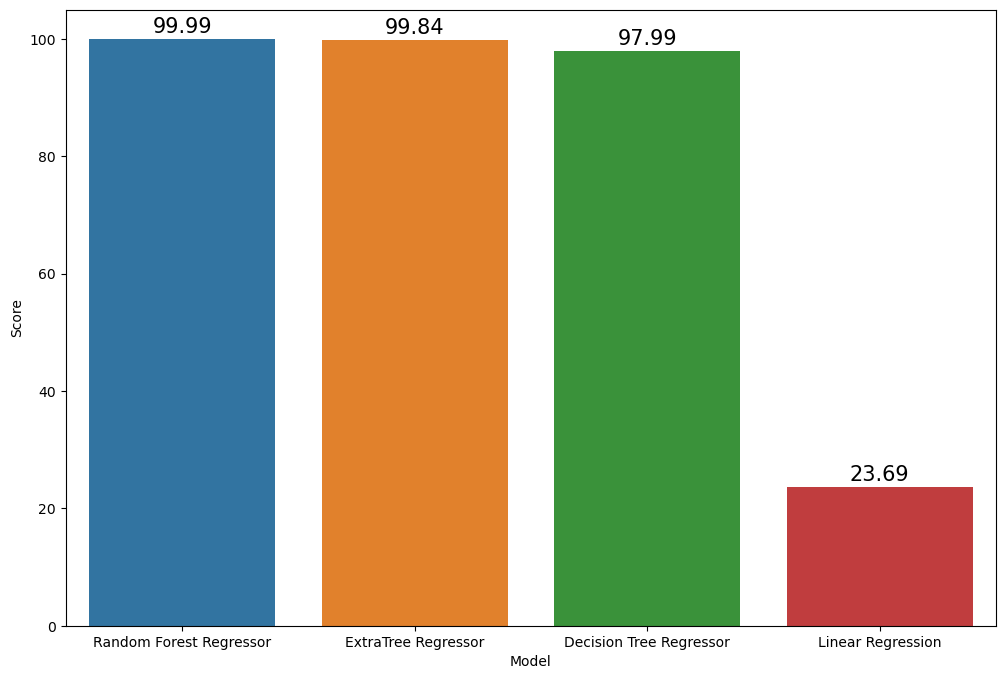

In [46]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Score",data=result_df)
labels = (result_df["Score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

In [47]:
zmt1=zmt1.drop(columns=['Item Name','Votes','Delivery Votes'])

In [48]:

feature_importances = model.feature_importances_
feature_importances

array([0.17863305, 0.09287121, 0.10537229, 0.11781859, 0.12163668,
       0.155661  , 0.09319052, 0.13481666])

In [49]:

# Sample feature importances (replace with your actual values)
feature_importances = np.array([0.15962031, 0.08605714, 0.0927186, 0.11382234, 0.05017269, 0.10957953, 0.13676294, 0.08571283, 0.00386233, 0.00465541, 0.15703587])

# Define a list of feature names in the same order as your features
feature_names = ['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes', 'Delivery Votes', 'Cuisine', 'Place Name', 'City', 'Item Name', 'Votes', 'Original Price']

# Create a dictionary to map feature names to their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted features and their importance scores
for feature, importance in sorted_features:
    print(f"{feature}: Importance = {importance}")


Restaurant Name: Importance = 0.15962031
Original Price: Importance = 0.15703587
Place Name: Importance = 0.13676294
Dining Votes: Importance = 0.11382234
Cuisine: Importance = 0.10957953
Delivery Rating: Importance = 0.0927186
Dining Rating: Importance = 0.08605714
City: Importance = 0.08571283
Delivery Votes: Importance = 0.05017269
Votes: Importance = 0.00465541
Item Name: Importance = 0.00386233


In [50]:

feature_importances = model.feature_importances_
feature_importances

array([0.17863305, 0.09287121, 0.10537229, 0.11781859, 0.12163668,
       0.155661  , 0.09319052, 0.13481666])

In [51]:
zero_count=zmt['Delivery Votes'].value_counts().get(0, 0)
zero_count

73963